In [ ]:
%pip install seaborn -q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '../dataset/india_housing_prices.csv'
df = pd.read_csv(file_path)
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


# Cleaning
1. Handle Missing Data
2. Remove Duplicates 
3. check for correct datatype
4. Standardize Text and Categories
5. Outlier Detection & Treatment
    Statistical methods: z-score, IQR
    Visualization: boxplots, scatter plots 

In [3]:
df.isna().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
convert_dict = {'ID': 'int64', 'State': 'category', 'City': 'category', 'Locality': 'string', 'Property_Type': 'category', 'BHK': 'int32', 'Size_in_SqFt': 'int64', 'Price_in_Lakhs': 'Float64',
                'Price_per_SqFt': 'Float64', 'Year_Built': 'int32', 'Furnished_Status': 'category', 'Floor_No' : 'int32', 'Total_Floors': 'int32', 'Age_of_Property': 'int32', 
                'Nearby_Schools': 'int32', 'Nearby_Hospitals': 'int32', 'Public_Transport_Accessibility': 'category', 
                'Parking_Space': 'category', 'Security': 'category', 'Amenities': 'string', 'Facing': 'category', 'Owner_Type': 'category', 'Availability_Status': 'category'}
df = df.astype(convert_dict)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID                              250000 non-null  int64   
 1   State                           250000 non-null  category
 2   City                            250000 non-null  category
 3   Locality                        250000 non-null  string  
 4   Property_Type                   250000 non-null  category
 5   BHK                             250000 non-null  int32   
 6   Size_in_SqFt                    250000 non-null  int64   
 7   Price_in_Lakhs                  250000 non-null  Float64 
 8   Price_per_SqFt                  250000 non-null  Float64 
 9   Year_Built                      250000 non-null  int32   
 10  Furnished_Status                250000 non-null  category
 11  Floor_No                        250000 non-null  int32   
 12  To

{'whiskers': [<matplotlib.lines.Line2D at 0x2afc5bbf200>,
 'caps': [<matplotlib.lines.Line2D at 0x2afc5bbf680>,
 'boxes': [<matplotlib.lines.Line2D at 0x2afc59fdfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x2afc5bbfcb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2afc5bbffe0>],
 'means': []}

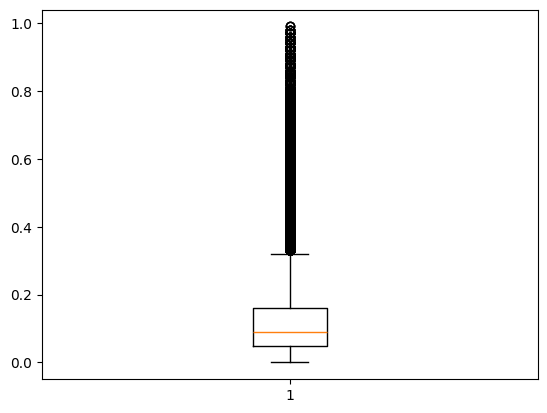

In [6]:
plt.boxplot(df['Price_per_SqFt'])

In [7]:
Q3 = df['Price_per_SqFt'].quantile(0.75)
Q1 = df['Price_per_SqFt'].quantile(0.25)

IQR = Q3 - Q1
upper_wisker = Q3 + 1.5 * IQR

lower_wisker = Q1 - 1.5 * IQR
upper_wisker, lower_wisker

outlier = df.loc[
    #(df['Price_per_SqFt'] < lower_wisker) |
    (df['Price_per_SqFt'] > upper_wisker)
]

outlier

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
10,11,Telangana,Warangal,Locality_75,Independent House,1,665,324.24,0.49,1991,...,34,1,8,Low,No,Yes,Clubhouse,North,Broker,Under_Construction
20,21,Uttar Pradesh,Noida,Locality_286,Independent House,3,1270,475.78,0.37,2018,...,7,3,4,Medium,No,Yes,"Clubhouse, Gym, Garden, Pool, Playground",North,Owner,Under_Construction
46,47,Tamil Nadu,Chennai,Locality_323,Villa,5,641,300.29,0.47,2017,...,8,5,1,Low,No,Yes,"Clubhouse, Playground",North,Builder,Ready_to_Move
49,50,Chhattisgarh,Bilaspur,Locality_458,Villa,4,733,438.74,0.6,2000,...,25,1,1,High,No,No,"Garden, Playground, Pool",West,Owner,Under_Construction
51,52,Uttarakhand,Haridwar,Locality_238,Independent House,4,556,308.46,0.55,2000,...,25,8,7,Medium,No,Yes,"Gym, Playground",North,Builder,Under_Construction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249908,249909,Uttarakhand,Dehradun,Locality_217,Independent House,3,803,360.84,0.45,1995,...,30,5,7,High,Yes,Yes,"Playground, Gym, Garden, Pool",East,Broker,Ready_to_Move
249925,249926,Karnataka,Mangalore,Locality_320,Villa,4,603,343.96,0.57,2014,...,11,1,10,High,Yes,No,"Clubhouse, Gym, Pool",East,Builder,Under_Construction
249936,249937,Bihar,Patna,Locality_408,Independent House,4,754,415.98,0.55,1996,...,29,7,9,Low,Yes,No,"Playground, Clubhouse",West,Builder,Under_Construction
249959,249960,Maharashtra,Pune,Locality_115,Villa,4,1034,406.21,0.39,2007,...,18,7,4,Low,No,No,Playground,North,Builder,Under_Construction


{'whiskers': [<matplotlib.lines.Line2D at 0x2afaaeb6ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x2afaaeb74d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2afaaeb6ba0>],
 'medians': [<matplotlib.lines.Line2D at 0x2afaaeb7980>],
 'fliers': [<matplotlib.lines.Line2D at 0x2afaaeb7bf0>],
 'means': []}

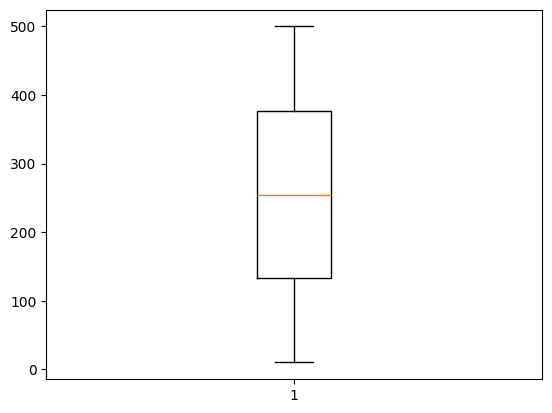

In [10]:
plt.boxplot(df['Price_in_Lakhs'])

# Validation
1. Domain validation
    eg. age > 0
2. Referential Integrity
    check relationship
3. Normalization
    Data is already normalized(eg. Price_per_SqFt)

In [11]:
cols = [
    'Age_of_Property', 'BHK', 'Price_per_SqFt',
    'Nearby_Hospitals', 'Nearby_Schools', 'Total_Floors'
]

for col in cols:
    print(f"{col}: {df[col].min()} - {df[col].max()}")


Age_of_Property: 2 - 35
BHK: 1 - 5
Price_per_SqFt: 0.0 - 0.99
Nearby_Hospitals: 1 - 10
Nearby_Schools: 1 - 10
Total_Floors: 1 - 30


# Transformation

1. Bedroom_Category (e.g., 1–2 = Small, 3–4 = Medium, 5+ = Large
    
2. Accessibility_Score = (Nearby_Schools + Nearby_Hospitals) / 2

3. Amenities_level_category (low, medium, high)

4. School_Density_Category (low < 3> /medium < 6 /high)

5. Healthcare_Access_Category (low/medium/high)

In [12]:

df['Bedroom_Category'] = df['BHK'].apply(lambda x: 'Small' if x < 2 
                                                    else ('Medium' if x < 4
                                                    else 'Large'))

df['School_Density'] = df['Nearby_Schools'].apply(lambda x: 'Low' if x <= 3 else ('Medium' if x <= 6 else 'High'))
df['Healthcare_Access'] = df['Nearby_Hospitals'].apply(lambda x: 'Low' if x <= 3 else ('Medium' if x <= 6 else 'High'))
df['Amenities_level'] = df['Amenities'].apply(lambda x: 'Low' if len(x.split()) < 2 else ('Medium' if len(x.split()) < 4 else 'High') )

df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Bedroom_Category,School_Density,Healthcare_Access,Amenities_level
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.1,1990,...,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,Small,High,Low,High
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,Medium,High,Low,High
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,Medium,High,High,High
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,Medium,Medium,High,High
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.9,0.04,2002,...,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,Large,Medium,High,High


# Exploratory data Analysis

In [14]:
import matplotlib.pyplot as plt
from scipy.stats import norm, kruskal, spearmanr
import sklearn


[Price] Mean: 254.59, Std Dev: 141.35
[Price per SqFt] Mean: 0.13, Std Dev: 0.13
[Size] Mean: 2749.81, Std Dev: 1300.60


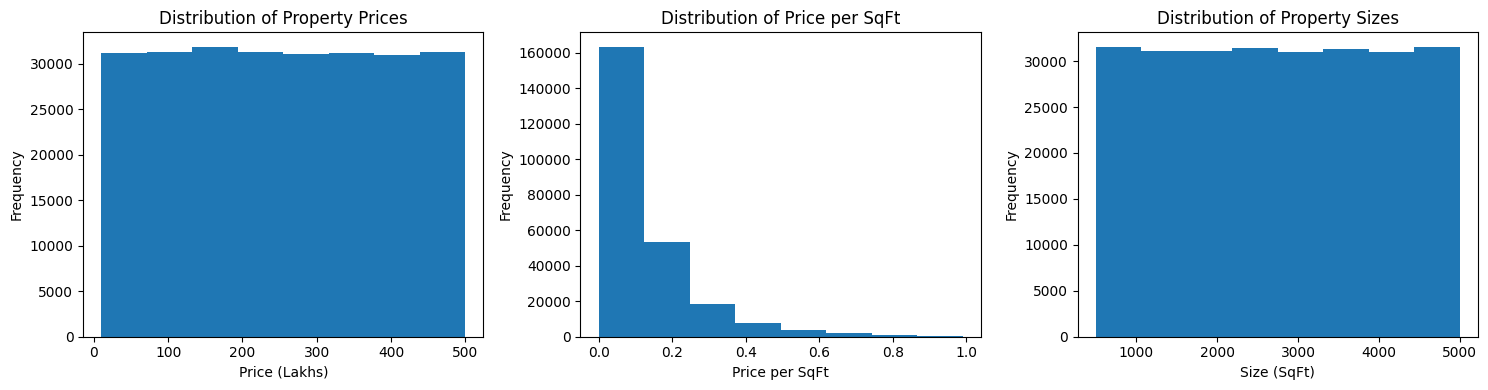

Kruskal–Wallis H-statistic: 7.701, p-value: 0.02127
Spearman Correlation: -0.0025, p-value: 0.20601


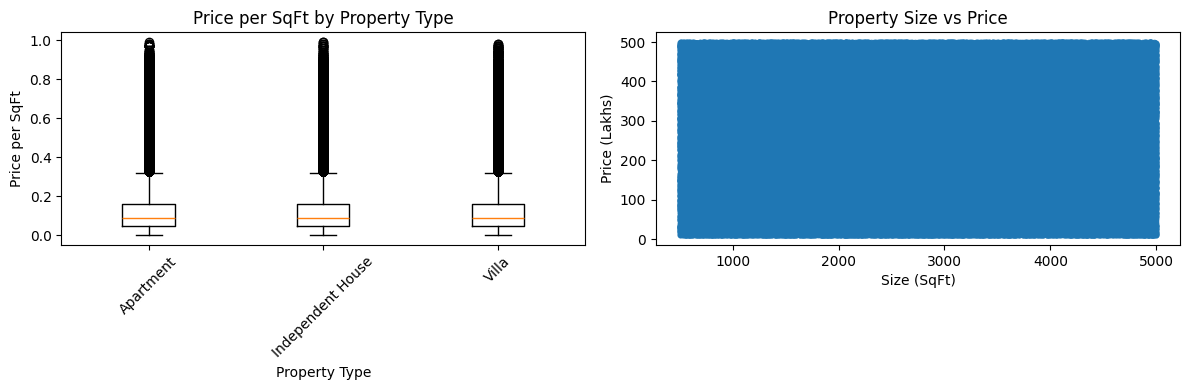

In [15]:
##### Price and Size Analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1. What is the distribution of property prices?
mu_price, sigma_price = norm.fit(df['Price_in_Lakhs'])
print(f"[Price] Mean: {mu_price:.2f}, Std Dev: {sigma_price:.2f}")
axes[0].hist(df['Price_in_Lakhs'], bins=8)
axes[0].set_title("Distribution of Property Prices")
axes[0].set_xlabel("Price (Lakhs)")
axes[0].set_ylabel("Frequency")
# Comment / takeaway: Data looks closer to uniform than normal.



# 2. Distribution of price per sqft
mu_pps, sigma_pps = norm.fit(df['Price_per_SqFt'])
print(f"[Price per SqFt] Mean: {mu_pps:.2f}, Std Dev: {sigma_pps:.2f}")
axes[1].hist(df['Price_per_SqFt'], bins=8)
axes[1].set_title("Distribution of Price per SqFt")
axes[1].set_xlabel("Price per SqFt")
axes[1].set_ylabel("Frequency")
# Comment / takeaway: Strong right skew: many small values, few large ones.


# 3. What is the distribution of property sizes?
mu_size, sigma_size = norm.fit(df['Size_in_SqFt'])
print(f"[Size] Mean: {mu_size:.2f}, Std Dev: {sigma_size:.2f}")
axes[2].hist(df['Size_in_SqFt'], bins=8)
axes[2].set_title("Distribution of Property Sizes")
axes[2].set_xlabel("Size (SqFt)")
axes[2].set_ylabel("Frequency")
# Comment / takeaway: Roughly uniform / non-normal.

plt.tight_layout()
plt.show()

# --------------------------------------------------
# 4–5. Price per SqFt by property type + correlation
# --------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 4. How does price per sqft vary by property type?
types = df['Property_Type'].unique()
groups = [df[df['Property_Type'] == t]['Price_per_SqFt'] for t in types]

# Kruskal–Wallis test (non-parametric ANOVA)
stat_kw, p_kw = kruskal(*groups)
print(f"Kruskal–Wallis H-statistic: {stat_kw:.3f}, p-value: {p_kw:.5f}")

axes[0].boxplot(groups)
axes[0].set_xticks(range(1, len(types) + 1))
axes[0].set_xticklabels(types, rotation=45)
axes[0].set_xlabel("Property Type")
axes[0].set_ylabel("Price per SqFt")
axes[0].set_title("Price per SqFt by Property Type")

# Interpretation: 1. Boxplots look similar, but Kruskal–Wallis p < 0.05
#                 2. All groups are right-skewed with many outliers.

# 5. Is there a relationship between property size and price?
corr_spear, p_spear = spearmanr(df['Size_in_SqFt'], df['Price_in_Lakhs'])
print(f"Spearman Correlation: {corr_spear:.4f}, p-value: {p_spear:.5f}")

axes[1].scatter(df['Size_in_SqFt'], df['Price_in_Lakhs'], s=10, alpha=0.7)
axes[1].set_xlabel("Size (SqFt)")
axes[1].set_ylabel("Price (Lakhs)")
axes[1].set_title("Property Size vs Price")

# Interpretation: 1. Correlation is ~0 and p > 0.05
#                 2. no statistically significant monotonic relationship.

plt.tight_layout()

plt.show()



# Price and Size Analysis – Key Points
1. Property prices and sizes do not follow a normal distribution; they look closer to uniform.
2. Price per SqFt is heavily right-skewed, with many low values and a few very high ones.
3. Kruskal–Wallis test indicates a significant difference in price per SqFt across property types (p < 0.05),
   even though the boxplots appear similar.
4. Spearman correlation between property size and price is near zero and not significant (p > 0.05),
   so there is no evidence of a meaningful relationship between them.
   



             State  avg_price
8        Karnataka   0.132538
0   Andhra Pradesh   0.132037
17   Uttar Pradesh   0.131417
15      Tamil Nadu   0.131367
5          Gujarat   0.130995
16       Telangana   0.130957
1            Assam   0.130819
10  Madhya Pradesh   0.130717
11     Maharashtra   0.130703
6          Haryana   0.130692
          City   avg_price
2    Bangalore  258.456639
37       Surat  258.080467
22       Kochi  257.415221
13        Gaya  257.053391
26   Mangalore  256.920925
9     Dehradun  256.890115
28      Mysore  256.848172
6      Chennai  256.830172
17   Hyderabad  256.594051
7   Coimbatore  256.504745
         Locality  median_age
470   Locality_72        21.0
338  Locality_403        21.0
473   Locality_75        20.0
31   Locality_127        20.0
0      Locality_1        20.0
499   Locality_99        20.0
443  Locality_499        20.0
447   Locality_51        20.0
435  Locality_491        20.0
416  Locality_474        20.0


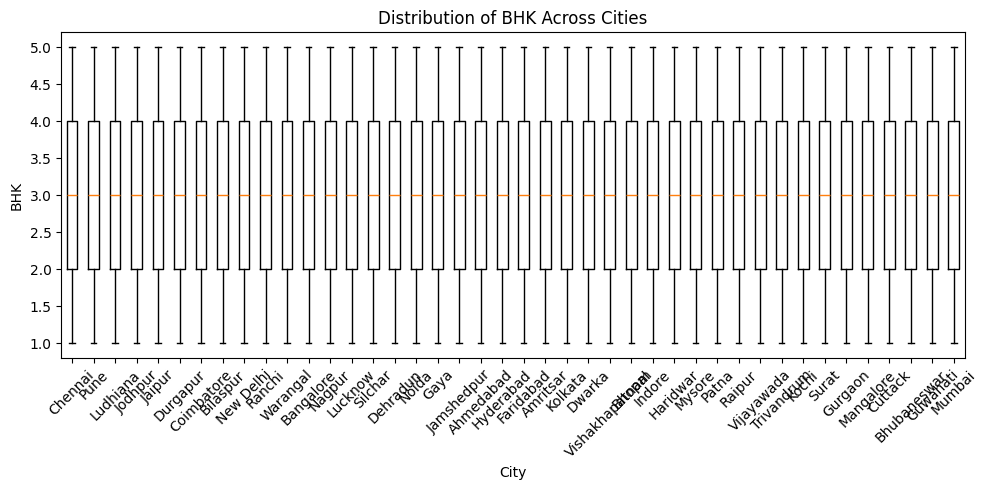

Kruskal–Wallis p-value: 0.9427104738121317


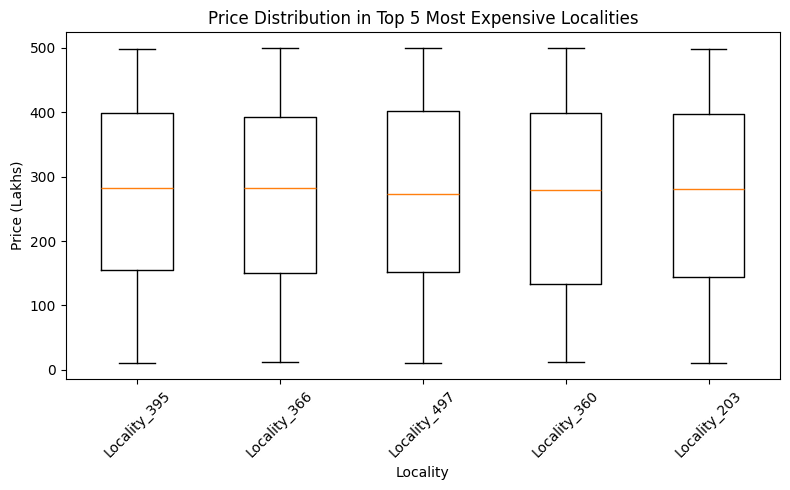

In [16]:
##### Location-based Analysis

# 1. What is the average price per sqft by state?
avg_price_by_state = (
    df.groupby('State', observed=True)['Price_per_SqFt']
      .mean()
      .reset_index(name='avg_price')
      .sort_values(by='avg_price', ascending=False)[:10]
)
print(avg_price_by_state)


# 2.What is the average property price by city?
avg_price_by_city = (
    df.groupby('City', observed=True)['Price_in_Lakhs']
      .mean()
      .reset_index(name='avg_price')
      .sort_values(by='avg_price', ascending=False)[:10]
)
print(avg_price_by_city)


# 3. What is the median age of properties by locality?
median_age_by_locality = (
    df.groupby('Locality', observed=True)['Age_of_Property']
      .median()
      .reset_index(name='median_age')
      .sort_values(by='median_age', ascending=False)[:10]
)
print(median_age_by_locality)


# 4. How is BHK distributed across cities?
cities = df['City'].unique()
bhk_groups = [df[df['City'] == c]['BHK'] for c in cities]

plt.figure(figsize=(10, 5))
plt.boxplot(bhk_groups)
plt.xticks(range(1, len(cities) + 1), cities, rotation=45)
plt.xlabel("City")
plt.ylabel("BHK")
plt.title("Distribution of BHK Across Cities")
plt.tight_layout()
plt.show()


# 5.What are the price trends for the top 5 most expensive localities?
top5_expensive_locality = (
    df.groupby('Locality')['Price_in_Lakhs']
      .mean()
      .reset_index(name='avg_price')
      .sort_values(by='avg_price', ascending=False)
      .head(5)
)


top5 = top5_expensive_locality['Locality']

price_groups = [df[df['Locality'] == loc]['Price_in_Lakhs'] for loc in top5]

stat, p = kruskal(*price_groups)
print("Kruskal–Wallis p-value:", p)


plt.figure(figsize=(8, 5))
plt.boxplot(price_groups)
plt.xticks(range(1, len(top5) + 1), top5, rotation=45)
plt.xlabel("Locality")
plt.ylabel("Price (Lakhs)")
plt.title("Price Distribution in Top 5 Most Expensive Localities")
plt.tight_layout()
plt.show()


# Conclusion: The p-value is much greater than 0.05, so the result is not statistically significant. We fail to reject the null hypothesis.
#             This means there is no significant difference in average property prices among the top 5 most expensive localities.


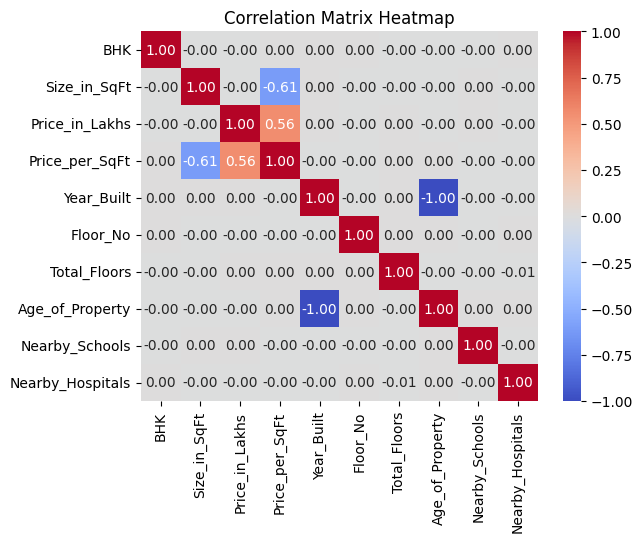

Spearman Correlation: -0.002309189362429385
p-value: 0.2482581803600071
Spearman Correlation: -0.001788848393793794
p-value: 0.37109698006556313
Kruskal–Wallis p-value: 0.6089275801671843


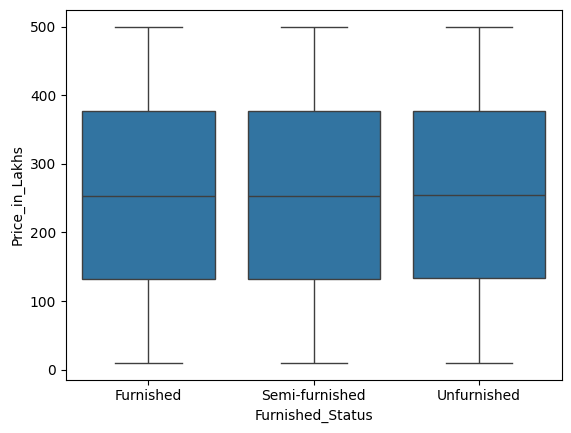

Kruskal–Wallis p-value: 0.6717720712436226


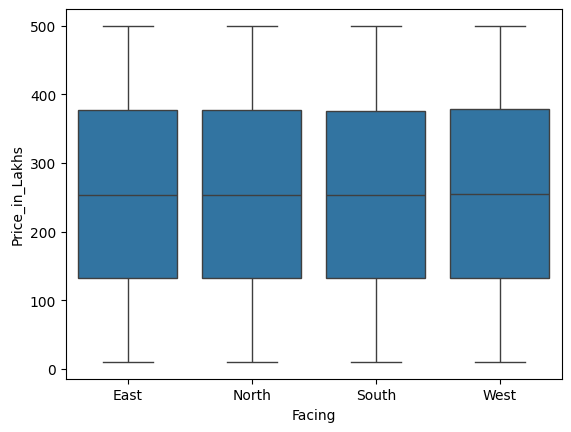

In [17]:



# Feature Relationship & Correlation

# How are numeric features correlated with each other?
numeric_df = df.select_dtypes(include = ['number'])[['BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt',	'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 
                                                     'Nearby_Hospitals']]
#plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
# heatmap dont show much just that price_perSqrt and property price are strongly (+ve related) and price_perSqrt and size_inSqFt is strong(-ve)

# How do nearby schools relate to price per sqft?

corr, p = spearmanr(df['Nearby_Schools'], df['Price_per_SqFt'])

print("Spearman Correlation:", corr)
print("p-value:", p)
# The Spearman correlation is almost zero, indicating no meaningful relationship between nearby schools and price per square foot.
# The p-value > 0.05, so this relationship is not statistically significant.

# How do nearby hospitals relate to price per sqft?
corr, p = spearmanr(df['Nearby_Hospitals'], df['Price_per_SqFt'])

print("Spearman Correlation:", corr)
print("p-value:", p)
# The Spearman correlation is almost zero, indicating no meaningful relationship between Nearby Hospitals and price per square foot.
# The p-value > 0.05, so this relationship is not statistically significant.


# How does price vary by furnished status?
sns.boxplot(x='Furnished_Status', y='Price_in_Lakhs', data=df)

groups = [
    df[df['Furnished_Status'] == 'Furnished']['Price_in_Lakhs'],
    df[df['Furnished_Status'] == 'Semi-furnished']['Price_in_Lakhs'],
    df[df['Furnished_Status'] == 'Unfurnished']['Price_in_Lakhs']
]

stat, p = kruskal(*groups)

print("Kruskal–Wallis p-value:", p)
plt.show()
# p = 0.609, which is very large
#Prices of Furnished, Semi furnished, and Unfurnished homes are statistically the SAME in your dataset.

# How does price per sqft vary by property facing direction?
sns.boxplot(x='Facing', y='Price_in_Lakhs', data=df)

groups = [
    df[df['Facing'] == 'East']['Price_in_Lakhs'],
    df[df['Facing'] == 'West']['Price_in_Lakhs'],
    df[df['Facing'] == 'North']['Price_in_Lakhs'],
    df[df['Facing'] == 'South']['Price_in_Lakhs']
]

stat, p = kruskal(*groups)

print("Kruskal–Wallis p-value:", p)


Kruskal–Wallis p-value: 0.5748531493139304


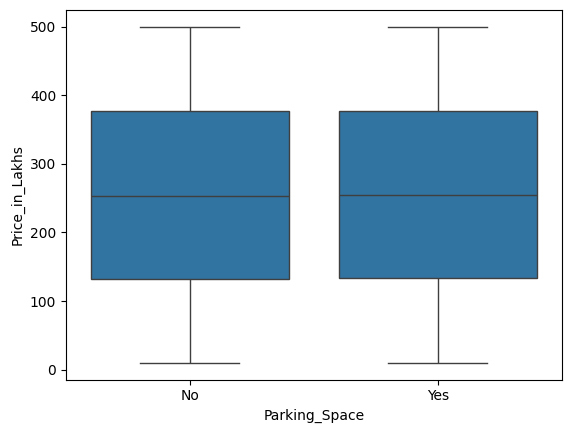

Kruskal–Wallis p-value: 0.34115295005791163


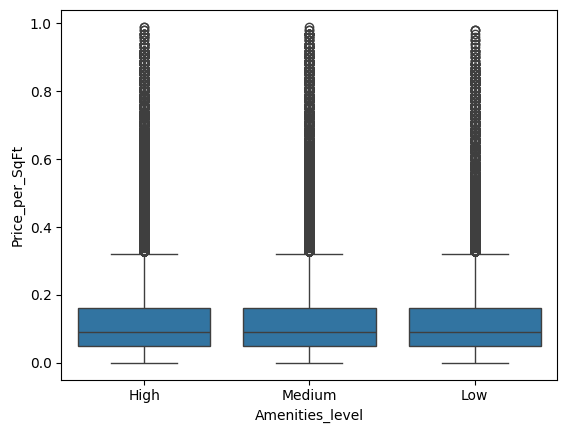

Kruskal–Wallis p-value: 0.6143845334535503


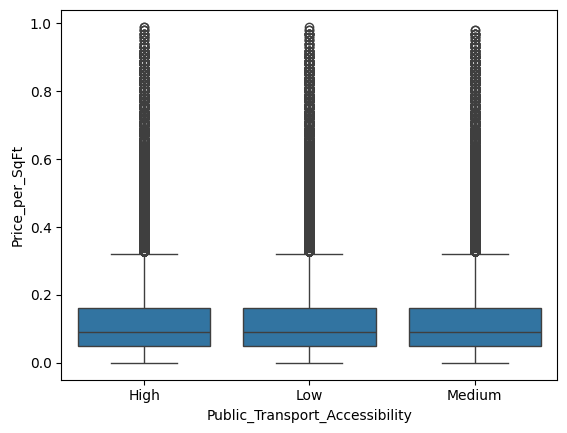

In [18]:


##### Investment / Amenities / Ownership Analysis

# 1. How many properties belong to each owner type?
df['Owner_Type'].value_counts()


# 2. How many properties are available under each availability status?
aval = len(df[df['Availability_Status'] == 'Ready_to_Move'])
aval


# 3. Does parking space affect property price?
sns.boxplot(x='Parking_Space', y='Price_in_Lakhs', data=df)

groups = [
    df[df['Parking_Space'] == 'Yes']['Price_in_Lakhs'],
    df[df['Parking_Space'] == 'No']['Price_in_Lakhs']
]

stat, p = kruskal(*groups)

print("Kruskal–Wallis p-value:", p)
# Kruskal–Wallis p-value: 0.5748531493139304
plt.show()

# 4. How do amenities affect price per sqft?
sns.boxplot(x='Amenities_level', y='Price_per_SqFt', data=df)

groups = [
    df[df['Amenities_level'] == 'Low']['Price_per_SqFt'],
    df[df['Amenities_level'] == 'Medium']['Price_per_SqFt'],
    df[df['Amenities_level'] == 'High']['Price_per_SqFt']
]

stat, p = kruskal(*groups)

print("Kruskal–Wallis p-value:", p)
# Kruskal–Wallis p-value: 0.34115295005791163


plt.show()
# 5. How does public transport accessibility relate to price per sqft or investment potential?

sns.boxplot(x='Public_Transport_Accessibility', y='Price_per_SqFt', data=df)

groups = [
    df[df['Public_Transport_Accessibility'] == 'Low']['Price_per_SqFt'],
    df[df['Public_Transport_Accessibility'] == 'Medium']['Price_per_SqFt'],
    df[df['Public_Transport_Accessibility'] == 'High']['Price_per_SqFt']
]

stat, p = kruskal(*groups)

print("Kruskal–Wallis p-value:", p)
#Kruskal–Wallis p-value: 0.6143845334535503

Kruskal–Wallis p-value: 0.6717720712436226


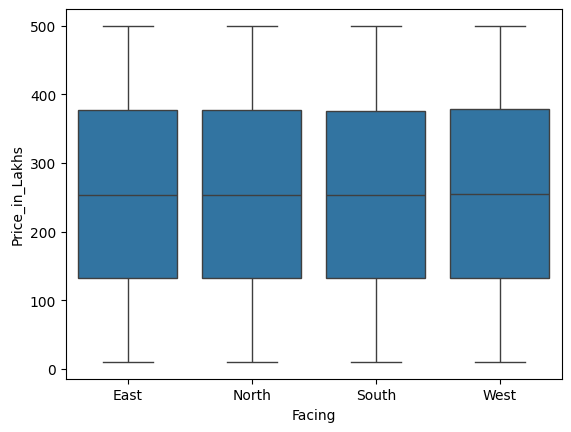

In [20]:
sns.boxplot(x='Facing', y='Price_in_Lakhs', data=df)

groups = [
    df[df['Facing'] == 'East']['Price_in_Lakhs'],
    df[df['Facing'] == 'West']['Price_in_Lakhs'],
    df[df['Facing'] == 'North']['Price_in_Lakhs'],
    df[df['Facing'] == 'South']['Price_in_Lakhs']
]

stat, p = kruskal(*groups)

print("Kruskal–Wallis p-value:", p)


In [ ]:
#df.to_csv("../dataset/cleaned_housing.csv", index=False)